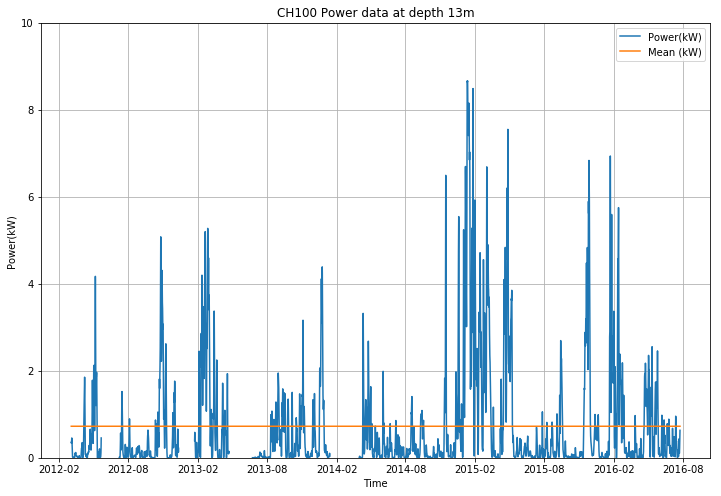

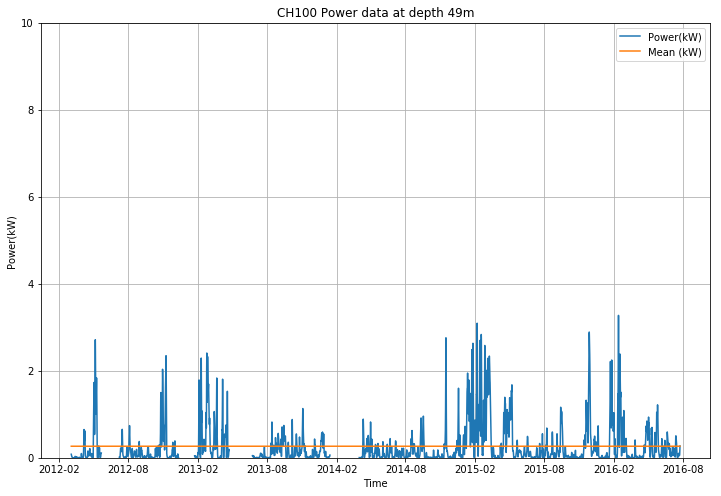

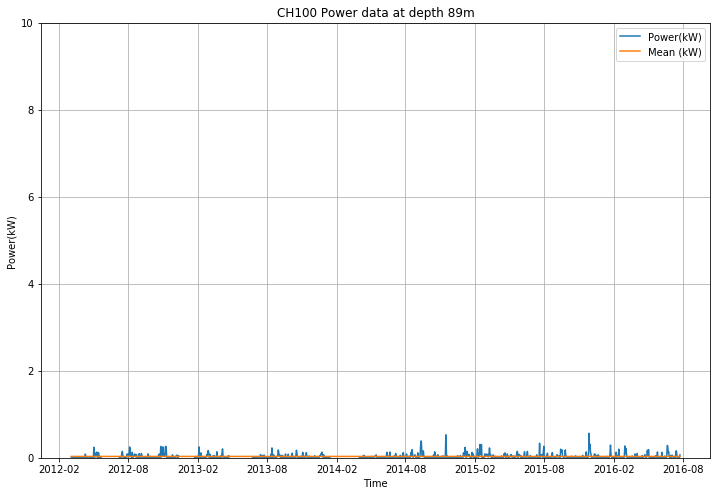

In [3]:
%matplotlib inline
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt 

data = sio.loadmat('/media/z3525831/Transcend/UNSW/DATA ADCP/CH100_nostructure.mat')

data_U = data['U']
data_V = data['V']
data_depthV = data['depthV']
data_t = data['t']
data_timeDV = data['timeDV']                      # We must define variables for each list key in the "data"                     
data_u25 = data['u25']                            # dictionary in order to be able to exploit them.
data_u55 = data['u55']
data_u90 = data['u90']
data_v25 = data['v25']
data_v55 = data['v55']
data_v90 = data['v90']


import datetime as dt
def matlab2datetime(matlab_datenum):
    day = dt.datetime.fromordinal(int(matlab_datenum))                       # Conversion of Matlab time data to  
    dayfrac = dt.timedelta(days=matlab_datenum%1) - dt.timedelta(days = 366) #'classic python time data.
    return day + dayfrac
t = data_t[0,:]
# convert Matlab variable "t" into list of python datetime objects.
py_t = [matlab2datetime(tval) for tval in t]

U13 = data_U[19,:]
V13 = data_V[19,:]       # Creation of variable 'U' and 'V' for three depth values (13,49,89).
U49 = data_U[10,:]       # [19,:]= 13m ; [10,:]= 49m  ;  [0,:] = 89m 
V49 = data_V[10,:]
U89 = data_U[0,:]
V89 = data_V[0,:]


# Creation of the variable P (Power density of the current) for each depth.
V13 = (U13*U13) + (V13*V13)
V13f = np.sqrt(V13)                        
P13 = 0.5 * 1025 * 4 * (V13f*V13f*V13f)     # So P = 1/2 * 1025 * 4 * Vf^3.
Pf13 = P13/1000                             # Converting unit W to kW for power.
Pf13m = np.nanmean(Pf13)
Pf13m = np.full((12808, ),  0.7253716544610653)


V49 = (U49*U49) + (V49*V49)
V49f = np.sqrt(V49)                        
P49 = 0.5 * 1025 * 4 * (V49f*V49f*V49f)     
Pf49 = P49/1000    
Pf49m = np.nanmean(Pf49)
Pf49m = np.full((12808, ),  0.2660728743977401)

V89 = (U89*U89) + (V89*V89)
V89f = np.sqrt(V89)                        
P89 = 0.5 * 1025 * 4 * (V89f*V89f*V89f)     
Pf89 = P89/1000    
Pf89m = np.nanmean(Pf89)
Pf89m = np.full((12808, ),  0.031341130788260084)





# Creation of different graphs.
plt.rcParams['figure.figsize'] = (12,8)
t = data_t[0,:]                        # Define the variable t (time) with the right size. 
plt.plot(py_t,Pf13,label="Power(kW)")  #define the variable uses
plt.plot(py_t,Pf13m,label="Mean (kW)")
axes = plt.gca()                       #define the min and max of the y axis
axes.set_ylim(0, 10)                   #define the min and max of the y axis
plt.xlabel("Time")                                                     
plt.ylabel("Power(kW) ")                      # Label definition for each axis and the title of the graph.
plt.title("CH100 Power data at depth 13m")      
plt.grid(True)                       
plt.legend()                          
plt.show()
plt.savefig('CH100 Power data at depth 13m')
                              
plt.rcParams['figure.figsize'] = (12,8)
t = data_t[0,:]               
plt.plot(py_t,Pf49, label="Power(kW)")
plt.plot(py_t,Pf49m,label="Mean (kW)")
axes = plt.gca() 
axes.set_ylim(0, 10)
plt.xlabel("Time")             
plt.ylabel("Power(kW) ")
plt.title("CH100 Power data at depth 49m")
plt.grid(True)                       
plt.legend() 
plt.show()

plt.rcParams['figure.figsize'] = (12,8)
t = data_t[0,:]               
plt.plot(py_t,Pf89, label="Power(kW)")
plt.plot(py_t,Pf89m,label="Mean (kW)")
axes = plt.gca() 
axes.set_ylim(0, 10)
plt.xlabel("Time")             
plt.ylabel("Power(kW) ")
plt.title("CH100 Power data at depth 89m")
plt.grid(True)                       
plt.legend() 
plt.show()
